# Libraries

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data

### Merging files 
#### Getting the links and merging the data directly from github public repository

In [2]:
months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
all_months_data = pd.DataFrame()

for month in months:
    df = pd.read_csv(f"https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Sales_Data/Sales_{month}_2019.csv")
    all_months_data = pd.concat([all_months_data, df])

#### If you want to save the data in a csv file

In [3]:
#all_months_data.to_csv("sales_data.csv", index = False)

In [4]:
sales_data = all_months_data
sales_data.head()

Order ID                   Product Quantity Ordered Price Each  \
0   141234                    iPhone                1        700   
1   141235  Lightning Charging Cable                1      14.95   
2   141236          Wired Headphones                2      11.99   
3   141237          27in FHD Monitor                1     149.99   
4   141238          Wired Headphones                1      11.99   

       Order Date                       Purchase Address  
0  01/22/19 21:25        944 Walnut St, Boston, MA 02215  
1  01/28/19 14:15       185 Maple St, Portland, OR 97035  
2  01/17/19 13:33  538 Adams St, San Francisco, CA 94016  
3  01/05/19 20:33     738 10th St, Los Angeles, CA 90001  
4  01/25/19 11:59          387 10th St, Austin, TX 73301

# Data Analysis

## Cleaning data

In [5]:
# Cheking NaN
nan_df = sales_data[sales_data.isna().any(axis = 1)]
nan_df.head()

Order ID Product Quantity Ordered Price Each Order Date Purchase Address
664       NaN     NaN              NaN        NaN        NaN              NaN
678       NaN     NaN              NaN        NaN        NaN              NaN
797       NaN     NaN              NaN        NaN        NaN              NaN
876       NaN     NaN              NaN        NaN        NaN              NaN
1299      NaN     NaN              NaN        NaN        NaN              NaN

In [6]:
# Deleting NaN
sales_data = sales_data.dropna(how="all")

In [7]:
#More clining since we got an error
temp_df = sales_data[sales_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

Order ID  Product  Quantity Ordered  Price Each  Order Date  \
1073  Order ID  Product  Quantity Ordered  Price Each  Order Date   
1102  Order ID  Product  Quantity Ordered  Price Each  Order Date   
1194  Order ID  Product  Quantity Ordered  Price Each  Order Date   
1897  Order ID  Product  Quantity Ordered  Price Each  Order Date   
2463  Order ID  Product  Quantity Ordered  Price Each  Order Date   

      Purchase Address  
1073  Purchase Address  
1102  Purchase Address  
1194  Purchase Address  
1897  Purchase Address  
2463  Purchase Address

In [8]:
#We delete those duplicated rows
sales_data = sales_data[sales_data['Order Date'] != "Order Date"]

In [9]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [10]:
#Convert columns to the correct type

sales_data["Quantity Ordered"] = sales_data["Quantity Ordered"].astype("int32")
sales_data["Price Each"] = pd.to_numeric(sales_data["Price Each"])
sales_data["Order Date"] = pd.to_datetime(sales_data["Order Date"])

### 1. What was the best month for sales? How much was earned that month?

In [11]:
# Add a sales column

sales_data["Sales"] = sales_data["Quantity Ordered"] * sales_data["Price Each"]
sales_data.head()

Order ID                   Product  Quantity Ordered  Price Each  \
0   141234                    iPhone                 1      700.00   
1   141235  Lightning Charging Cable                 1       14.95   
2   141236          Wired Headphones                 2       11.99   
3   141237          27in FHD Monitor                 1      149.99   
4   141238          Wired Headphones                 1       11.99   

           Order Date                       Purchase Address   Sales  
0 2019-01-22 21:25:00        944 Walnut St, Boston, MA 02215  700.00  
1 2019-01-28 14:15:00       185 Maple St, Portland, OR 97035   14.95  
2 2019-01-17 13:33:00  538 Adams St, San Francisco, CA 94016   23.98  
3 2019-01-05 20:33:00     738 10th St, Los Angeles, CA 90001  149.99  
4 2019-01-25 11:59:00          387 10th St, Austin, TX 73301   11.99

In [12]:
#There was data from January 2020, we delet it

sales_data = sales_data[sales_data["Order Date"].dt.year == 2019]

In [13]:
results = sales_data.groupby(pd.Grouper(key="Order Date",freq="M")).sum()
results

Quantity Ordered    Price Each         Sales
Order Date                                              
2019-01-31             10862  1.803265e+06  1.813586e+06
2019-02-28             13449  2.188885e+06  2.202022e+06
2019-03-31             17005  2.791208e+06  2.807100e+06
2019-04-30             20558  3.367671e+06  3.390670e+06
2019-05-31             18667  3.135125e+06  3.152607e+06
2019-06-30             15253  2.562026e+06  2.577802e+06
2019-07-31             16072  2.632540e+06  2.647776e+06
2019-08-31             13448  2.230345e+06  2.244468e+06
2019-09-30             13109  2.084992e+06  2.097560e+06
2019-10-31             22703  3.715555e+06  3.736727e+06
2019-11-30             19798  3.180601e+06  3.199603e+06
2019-12-31             28114  4.588415e+06  4.613443e+06

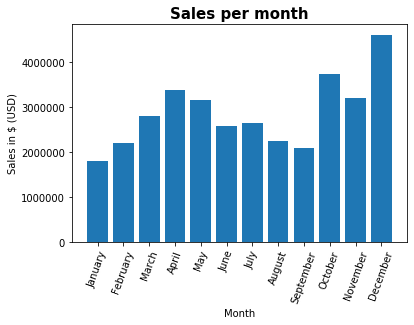

In [14]:
# plt.rcdefaults()

months = results.index
months = months.month_name()
                         
plt.bar(months, results["Sales"])
plt.title("Sales per month", fontsize = 15, weight = "bold")
plt.ylabel("Sales in $ (USD)")
plt.xlabel("Month")
plt.xticks(rotation = 70)
plt.show()

In [15]:
# Had a bug, so checked how many orders have in the month of October. Leaving it just to remember how to access to a month row
results[months == "October"]

Quantity Ordered    Price Each         Sales
Order Date                                              
2019-10-31             22703  3.715555e+06  3.736727e+06

### 2. What US city had the highest number of sales?

In [16]:
sales_data.head()

Order ID                   Product  Quantity Ordered  Price Each  \
0   141234                    iPhone                 1      700.00   
1   141235  Lightning Charging Cable                 1       14.95   
2   141236          Wired Headphones                 2       11.99   
3   141237          27in FHD Monitor                 1      149.99   
4   141238          Wired Headphones                 1       11.99   

           Order Date                       Purchase Address   Sales  
0 2019-01-22 21:25:00        944 Walnut St, Boston, MA 02215  700.00  
1 2019-01-28 14:15:00       185 Maple St, Portland, OR 97035   14.95  
2 2019-01-17 13:33:00  538 Adams St, San Francisco, CA 94016   23.98  
3 2019-01-05 20:33:00     738 10th St, Los Angeles, CA 90001  149.99  
4 2019-01-25 11:59:00          387 10th St, Austin, TX 73301   11.99

In [17]:
# Creating city column

def get_city(address):
    return address.split(",")[1]

def get_state(address):
    return address.split(",")[2].split(" ")[1]

sales_data["City"] = sales_data["Purchase Address"].apply(lambda x : get_city(x) + " " + get_state(x))

sales_data.head()

Order ID                   Product  Quantity Ordered  Price Each  \
0   141234                    iPhone                 1      700.00   
1   141235  Lightning Charging Cable                 1       14.95   
2   141236          Wired Headphones                 2       11.99   
3   141237          27in FHD Monitor                 1      149.99   
4   141238          Wired Headphones                 1       11.99   

           Order Date                       Purchase Address   Sales  \
0 2019-01-22 21:25:00        944 Walnut St, Boston, MA 02215  700.00   
1 2019-01-28 14:15:00       185 Maple St, Portland, OR 97035   14.95   
2 2019-01-17 13:33:00  538 Adams St, San Francisco, CA 94016   23.98   
3 2019-01-05 20:33:00     738 10th St, Los Angeles, CA 90001  149.99   
4 2019-01-25 11:59:00          387 10th St, Austin, TX 73301   11.99   

                City  
0          Boston MA  
1        Portland OR  
2   San Francisco CA  
3     Los Angeles CA  
4          Austin TX

In [18]:
results_city = sales_data.groupby("City").sum().sort_values(by = "Sales")
results_city_index = results_city.index

In [19]:
#cities = sales_data["City"].unique() # this is ok, but we need this array to be in the same order than ersults_city["Sales"]
#cities = [city for city, df in results_city.groupby("City")] # this would give us the same order than in the original df

In [20]:
cities = [city for city in results_city_index ]
cities

[' Portland ME',
 ' Austin TX',
 ' Portland OR',
 ' Seattle WA',
 ' Dallas TX',
 ' Atlanta GA',
 ' Boston MA',
 ' New York City NY',
 ' Los Angeles CA',
 ' San Francisco CA']

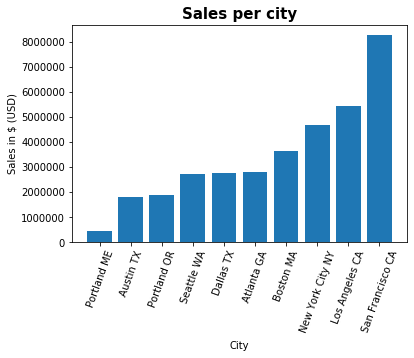

In [21]:
plt.bar(cities, results_city["Sales"])
plt.title("Sales per city", fontsize = 15, weight = "bold")
plt.ylabel("Sales in $ (USD)")
plt.xlabel("City")
plt.xticks(rotation = 70)
plt.show()

### What time should we display adds to maximize the likehood of customer's buying products?

In [22]:
# We could do this
results_hour = sales_data.groupby(pd.Grouper(key="Order Date",freq="H")).count() # we count the items bought
results_hour.head()

Order ID  Product  Quantity Ordered  Price Each  \
Order Date                                                             
2019-01-01 03:00:00         2        2                 2           2   
2019-01-01 04:00:00         1        1                 1           1   
2019-01-01 05:00:00         1        1                 1           1   
2019-01-01 06:00:00         4        4                 4           4   
2019-01-01 07:00:00        12       12                12          12   

                     Purchase Address  Sales  City  
Order Date                                          
2019-01-01 03:00:00                 2      2     2  
2019-01-01 04:00:00                 1      1     1  
2019-01-01 05:00:00                 1      1     1  
2019-01-01 06:00:00                 4      4     4  
2019-01-01 07:00:00                12     12    12

In [23]:
sales_data.head()

Order ID                   Product  Quantity Ordered  Price Each  \
0   141234                    iPhone                 1      700.00   
1   141235  Lightning Charging Cable                 1       14.95   
2   141236          Wired Headphones                 2       11.99   
3   141237          27in FHD Monitor                 1      149.99   
4   141238          Wired Headphones                 1       11.99   

           Order Date                       Purchase Address   Sales  \
0 2019-01-22 21:25:00        944 Walnut St, Boston, MA 02215  700.00   
1 2019-01-28 14:15:00       185 Maple St, Portland, OR 97035   14.95   
2 2019-01-17 13:33:00  538 Adams St, San Francisco, CA 94016   23.98   
3 2019-01-05 20:33:00     738 10th St, Los Angeles, CA 90001  149.99   
4 2019-01-25 11:59:00          387 10th St, Austin, TX 73301   11.99   

                City  
0          Boston MA  
1        Portland OR  
2   San Francisco CA  
3     Los Angeles CA  
4          Austin TX

In [24]:
# Or we could add a column that specifies the hour. Going with this option cause it's easier to plot later.
sales_data["Hour"] = sales_data["Order Date"].dt.hour

In [25]:
sales_data.head(3)

Order ID                   Product  Quantity Ordered  Price Each  \
0   141234                    iPhone                 1      700.00   
1   141235  Lightning Charging Cable                 1       14.95   
2   141236          Wired Headphones                 2       11.99   

           Order Date                       Purchase Address   Sales  \
0 2019-01-22 21:25:00        944 Walnut St, Boston, MA 02215  700.00   
1 2019-01-28 14:15:00       185 Maple St, Portland, OR 97035   14.95   
2 2019-01-17 13:33:00  538 Adams St, San Francisco, CA 94016   23.98   

                City  Hour  
0          Boston MA    21  
1        Portland OR    14  
2   San Francisco CA    13

In [26]:
sales_data.groupby(["Hour"]).count()

Order ID  Product  Quantity Ordered  Price Each  Order Date  \
Hour                                                                
0         3898     3898              3898        3898        3898   
1         2341     2341              2341        2341        2341   
2         1239     1239              1239        1239        1239   
3          828      828               828         828         828   
4          850      850               850         850         850   
5         1319     1319              1319        1319        1319   
6         2482     2482              2482        2482        2482   
7         4011     4011              4011        4011        4011   
8         6256     6256              6256        6256        6256   
9         8748     8748              8748        8748        8748   
10       10944    10944             10944       10944       10944   
11       12411    12411             12411       12411       12411   
12       12587    12587             12587       12587       12587   
13       12129    12129             12129       12129       12129   
14       10984    10984             10984       10984       10984   
15       10175    10175             10175       10175       10175   
16       10384    10384             10384       10384       10384   
17       10899    10899             10899       10899       10899   
18       12280    12280             12280       12280       12280   
19       12905    12905             12905       12905       12905   
20       12228    12228             12228       12228       12228   
21       10921    10921             10921       10921       10921   
22        8822     8822              8822        8822        8822   
23        6275     6275              6275        6275        6275   

      Purchase Address  Sales   City  
Hour                                  
0                 3898   3898   3898  
1                 2341   2341   2341  
2                 1239   1239   1239  
3                  828    828    828  
4                  850    850    850  
5                 1319   1319   1319  
6                 2482   2482   2482  
7                 4011   4011   4011  
8                 6256   6256   6256  
9                 8748   8748   8748  
10               10944  10944  10944  
11               12411  12411  12411  
12               12587  12587  12587  
13               12129  12129  12129  
14               10984  10984  10984  
15               10175  10175  10175  
16               10384  10384  10384  
17               10899  10899  10899  
18               12280  12280  12280  
19               12905  12905  12905  
20               12228  12228  12228  
21               10921  10921  10921  
22                8822   8822   8822  
23                6275   6275   6275

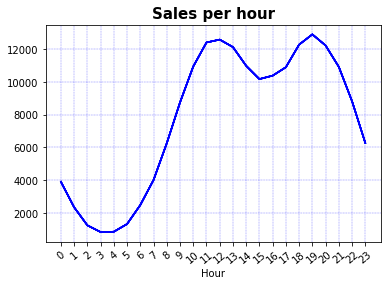

In [27]:
hours = [hour for hour, df in sales_data.groupby(["Hour"])]

plt.plot(hours, sales_data.groupby(["Hour"]).count(), color = "blue")
plt.title("Sales per hour", fontsize = 15, weight = "bold")
plt.xlabel("Hour")
plt.xticks(hours, rotation = 40)
plt.grid(color='b', ls = '-.', lw = 0.25)
plt.show()

### 3. What products are usually sold together? 

In [28]:
df = sales_data[sales_data["Order ID"].duplicated(keep = False)]
df.head()

Order ID                   Product  Quantity Ordered  Price Each  \
41    141275      USB-C Charging Cable                 1       11.95   
42    141275          Wired Headphones                 1       11.99   
57    141290  Apple Airpods Headphones                 1      150.00   
58    141290     AA Batteries (4-pack)                 3        3.84   
133   141365           Vareebadd Phone                 1      400.00   

             Order Date                        Purchase Address   Sales  \
41  2019-01-07 16:06:00         610 Walnut St, Austin, TX 73301   11.95   
42  2019-01-07 16:06:00         610 Walnut St, Austin, TX 73301   11.99   
57  2019-01-02 08:25:00         4 1st St, Los Angeles, CA 90001  150.00   
58  2019-01-02 08:25:00         4 1st St, Los Angeles, CA 90001   11.52   
133 2019-01-10 11:19:00  20 Dogwood St, New York City, NY 10001  400.00   

                  City  Hour  
41           Austin TX    16  
42           Austin TX    16  
57      Los Angeles CA     8  
58      Los Angeles CA     8  
133   New York City NY    11

In [29]:
df["Grouped"] = df.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))
df.head()

C:\Users\nolis\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Order ID                   Product  Quantity Ordered  Price Each  \
41    141275      USB-C Charging Cable                 1       11.95   
42    141275          Wired Headphones                 1       11.99   
57    141290  Apple Airpods Headphones                 1      150.00   
58    141290     AA Batteries (4-pack)                 3        3.84   
133   141365           Vareebadd Phone                 1      400.00   

             Order Date                        Purchase Address   Sales  \
41  2019-01-07 16:06:00         610 Walnut St, Austin, TX 73301   11.95   
42  2019-01-07 16:06:00         610 Walnut St, Austin, TX 73301   11.99   
57  2019-01-02 08:25:00         4 1st St, Los Angeles, CA 90001  150.00   
58  2019-01-02 08:25:00         4 1st St, Los Angeles, CA 90001   11.52   
133 2019-01-10 11:19:00  20 Dogwood St, New York City, NY 10001  400.00   

                  City  Hour                                         Grouped  
41           Austin TX    16           USB-C Charging Cable,Wired Headphones  
42           Austin TX    16           USB-C Charging Cable,Wired Headphones  
57      Los Angeles CA     8  Apple Airpods Headphones,AA Batteries (4-pack)  
58      Los Angeles CA     8  Apple Airpods Headphones,AA Batteries (4-pack)  
133   New York City NY    11                Vareebadd Phone,Wired Headphones

In [30]:
df[["Order ID", "Grouped"]].drop_duplicates()

Order ID                                          Grouped
41      141275            USB-C Charging Cable,Wired Headphones
57      141290   Apple Airpods Headphones,AA Batteries (4-pack)
133     141365                 Vareebadd Phone,Wired Headphones
153     141384                Google Phone,USB-C Charging Cable
220     141450          Google Phone,Bose SoundSport Headphones
...        ...                                              ...
24977   319536              Macbook Pro Laptop,Wired Headphones
24998   319556                    Google Phone,Wired Headphones
25027   319584                          iPhone,Wired Headphones
25040   319596                  iPhone,Lightning Charging Cable
25076   319631  34in Ultrawide Monitor,Lightning Charging Cable

[7133 rows x 2 columns]

In [31]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(",")
    count.update(combinations(row_list, 2)) #combinations of 2 products

#count.most_common(20)

for key, value in count.most_common(20):
    print(key, value)



('iPhone', 'Lightning Charging Cable') 2138
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 797
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253
('Lightning Charging Cable', 'Apple Airpods Headphones') 214
('USB-C Charging Cable', 'Bose SoundSport Headphones') 211
('Vareebadd Phone', 'Bose SoundSport Headphones') 182
('Apple Airpods Headphones', 'Wired Headphones') 170
('Bose SoundSport Headphones', 'Wired Headphones') 140
('Lightning Charging Cable', 'USB-C Charging Cable') 120
('Lightning Charging Cable', 'AA Batteries (4-pack)') 114
('Lightning Charging Cable', 'Lightning Charging Cable') 111
('AA Batteries (4-pack)', 'Lightning Charging Cable') 102
('AAA Batteries (4-pack)', 'US

### 4. What product sold the most?

In [60]:
grouped_products = sales_data.groupby("Product")

quantity_ordered = grouped_products["Quantity Ordered"].sum().sort_values()
products = [product for product in quantity_ordered.index]

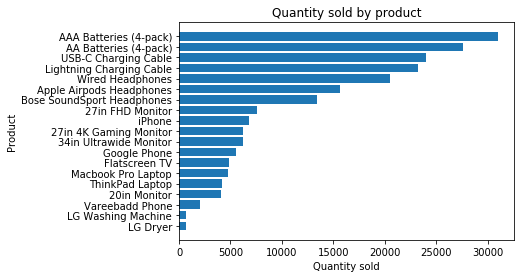

In [68]:
plt.barh(products, quantity_ordered)
plt.title("Quantity sold by product")
plt.xlabel("Quantity sold")
plt.ylabel("Product")
plt.show()

#### Why are those the most sold? Is there a correlation between that and the price?

In [137]:
prices = sales_data.groupby("Product").mean()["Price Each"]
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [136]:
quantity_ordered.index

Index(['LG Dryer', 'LG Washing Machine', 'Vareebadd Phone', '20in Monitor',
       'ThinkPad Laptop', 'Macbook Pro Laptop', 'Flatscreen TV',
       'Google Phone', '34in Ultrawide Monitor', '27in 4K Gaming Monitor',
       'iPhone', '27in FHD Monitor', 'Bose SoundSport Headphones',
       'Apple Airpods Headphones', 'Wired Headphones',
       'Lightning Charging Cable', 'USB-C Charging Cable',
       'AA Batteries (4-pack)', 'AAA Batteries (4-pack)'],
      dtype='object', name='Product')

In [156]:
prices2 = [prices[item] for item in quantity_ordered.index]
prices2

[600.0,
 600.0,
 400.0,
 109.98999999999407,
 999.9900000001056,
 1700.0,
 300.0,
 600.0,
 379.9900000000163,
 389.99000000002314,
 700.0,
 149.98999999999205,
 99.98999999999184,
 150.0,
 11.989999999997403,
 14.950000000006096,
 11.950000000004783,
 3.8399999999980117,
 2.989999999999419]

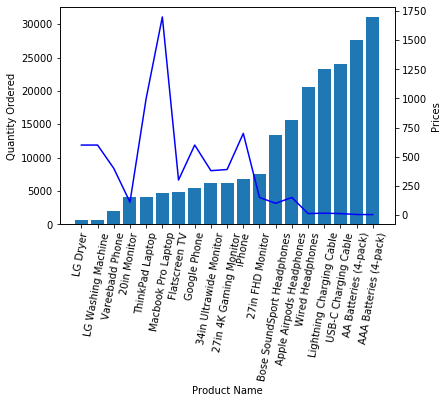

In [157]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered)
ax2.plot(products, prices2, "b-")

ax1.set_xlabel("Product Name")
ax1.set_xticklabels(products, rotation = 80)
ax1.set_ylabel("Quantity Ordered")
ax2.set_ylabel("Prices")

plt.show()

#### Let's try another kind of plot:

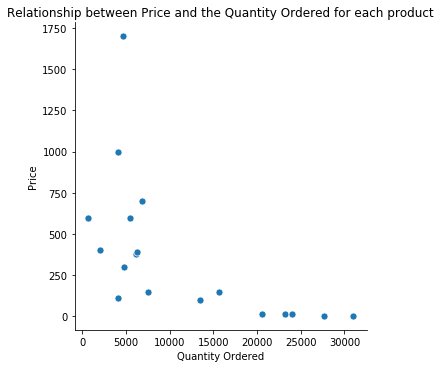

In [193]:
# Doing a DF 

data_products = {"Price" : prices2,
                "Quantity Ordered" : quantity_ordered}

data_products = pd.DataFrame(data_products, columns=["Price", "Quantity Ordered"])

# Plot DF

sns.relplot(data = data_products,
            x = "Quantity Ordered", 
            y = "Price", s=50).set(title = "Relationship between Price and the Quantity Ordered for each product")

plt.show()